In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [3]:
data=pd.read_excel('bank.xlsx')
data.head()

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.
0,409000611074',2017-06-29,TRF FROM Indiaforensic SERVICES,NaN,2017-06-29,NaN,1000000.0,1000000.0,.
1,409000611074',2017-07-05,TRF FROM Indiaforensic SERVICES,NaN,2017-07-05,NaN,1000000.0,2000000.0,.
2,409000611074',2017-07-18,FDRL/INTERNAL FUND TRANSFE,NaN,2017-07-18,NaN,500000.0,2500000.0,.
3,409000611074',2017-08-01,TRF FRM Indiaforensic SERVICES,NaN,2017-08-01,NaN,3000000.0,5500000.0,.
4,409000611074',2017-08-16,FDRL/INTERNAL FUND TRANSFE,NaN,2017-08-16,NaN,500000.0,6000000.0,.


In [4]:
data.shape

(116201, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116201 entries, 0 to 116200
Data columns (total 9 columns):
Account No             116201 non-null object
DATE                   116201 non-null datetime64[ns]
TRANSACTION DETAILS    113702 non-null object
CHQ.NO.                905 non-null float64
VALUE DATE             116201 non-null datetime64[ns]
WITHDRAWAL AMT         53549 non-null float64
DEPOSIT AMT            62652 non-null float64
BALANCE AMT            116201 non-null float64
.                      116201 non-null object
dtypes: datetime64[ns](2), float64(4), object(3)
memory usage: 8.0+ MB


In [6]:
# converting 'Account No' column from object to int 
data['Account No']=data['Account No'].apply(lambda x : x.replace("'","")).astype(str).astype(np.int64)

In [7]:
# Checking null values
(data.isna().sum()/data.shape[0])*100

Account No              0.000000
DATE                    0.000000
TRANSACTION DETAILS     2.150584
CHQ.NO.                99.221177
VALUE DATE              0.000000
WITHDRAWAL AMT         53.916920
DEPOSIT AMT            46.083080
BALANCE AMT             0.000000
.                       0.000000
dtype: float64

In [8]:
data.drop('.',1,inplace=True) # dropping '.' column because it doesn't contain any data 
data.drop('CHQ.NO.',1,inplace=True)  # dropping 'CHQ.NO.' column because it contain 99.22 % null values

In [9]:
import statistics
statistics.mode(data['TRANSACTION DETAILS'])

'FDRL/INTERNAL FUND TRANSFE'

In [10]:
''''TRANSACTION DETAILS' contain 2.15% of null values and it's dtype is object because of that 
I'm replacing null values with Mode value''' 


data['TRANSACTION DETAILS']=data['TRANSACTION DETAILS'].fillna('FDRL/INTERNAL FUND TRANSFE')

In [11]:
data['WITHDRAWAL AMT']=data['WITHDRAWAL AMT'].fillna(0)#.apply(lambda x : '%3f' % x)
data['DEPOSIT AMT']=data['DEPOSIT AMT'].fillna(0)

In [12]:
(data.isna().sum()/data.shape[0])*100

Account No             0.0
DATE                   0.0
TRANSACTION DETAILS    0.0
VALUE DATE             0.0
WITHDRAWAL AMT         0.0
DEPOSIT AMT            0.0
BALANCE AMT            0.0
dtype: float64

In [13]:
## Extracting Date, Month, Year from Date column
data['YEAR']=data['DATE'].dt.year
data['MONTH']=data['DATE'].dt.month
data['DAY']=data['DATE'].dt.day

In [14]:
data.head()

,Account No,DATE,TRANSACTION DETAILS,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,YEAR,MONTH,DAY
0,409000611074,2017-06-29,TRF FROM Indiaforensic SERVICES,2017-06-29,0.0,1000000.0,1000000.0,2017,6,29
1,409000611074,2017-07-05,TRF FROM Indiaforensic SERVICES,2017-07-05,0.0,1000000.0,2000000.0,2017,7,5
2,409000611074,2017-07-18,FDRL/INTERNAL FUND TRANSFE,2017-07-18,0.0,500000.0,2500000.0,2017,7,18
3,409000611074,2017-08-01,TRF FRM Indiaforensic SERVICES,2017-08-01,0.0,3000000.0,5500000.0,2017,8,1
4,409000611074,2017-08-16,FDRL/INTERNAL FUND TRANSFE,2017-08-16,0.0,500000.0,6000000.0,2017,8,16


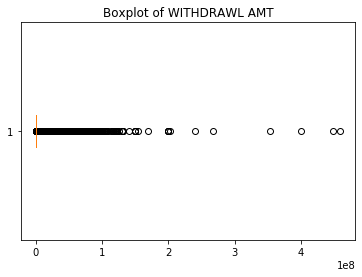

In [15]:
plt.title('Boxplot of WITHDRAWL AMT')
plt.boxplot(data['WITHDRAWAL AMT'],vert=False)
plt.show()

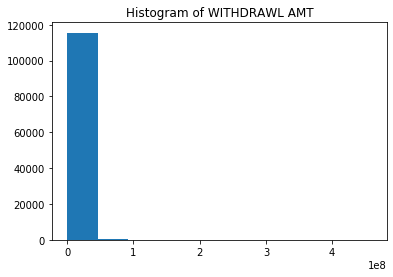

In [16]:
plt.title('Histogram of WITHDRAWL AMT')
plt.hist(data['WITHDRAWAL AMT'])
plt.show()

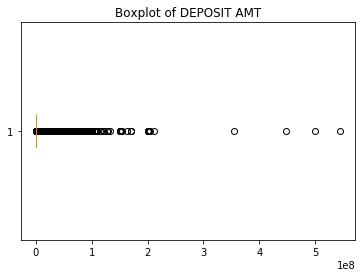

In [17]:
plt.title('Boxplot of DEPOSIT AMT')
plt.boxplot(data['DEPOSIT AMT'],vert=False)
plt.show()

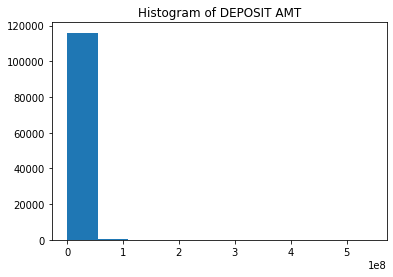

In [18]:
plt.title('Histogram of DEPOSIT AMT')
plt.hist(data['DEPOSIT AMT'])
plt.show()

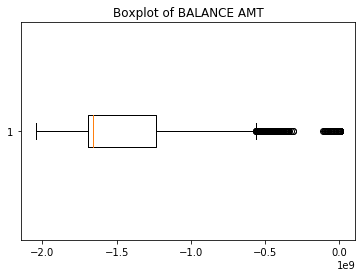

In [19]:
plt.title('Boxplot of BALANCE AMT')
plt.boxplot(data['BALANCE AMT'],vert=False)
plt.show()

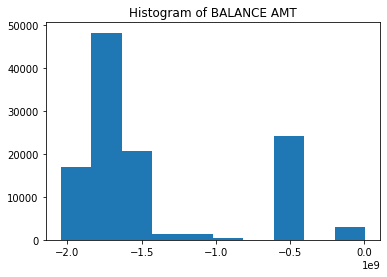

In [20]:
plt.title('Histogram of BALANCE AMT')
plt.hist(data['BALANCE AMT'])
plt.show()

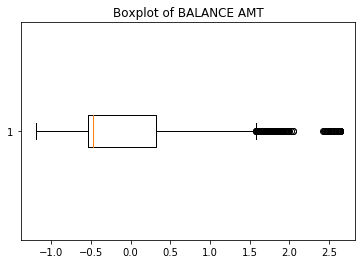

In [40]:
plt.title('Boxplot of BALANCE AMT')
plt.boxplot(ssdata['BALANCE AMT'],vert=False)
plt.show()

In [23]:
ndata=data._get_numeric_data()

In [24]:
ndata.head()

,Account No,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,YEAR,MONTH,DAY
0,409000611074,0.0,1000000.0,1000000.0,2017,6,29
1,409000611074,0.0,1000000.0,2000000.0,2017,7,5
2,409000611074,0.0,500000.0,2500000.0,2017,7,18
3,409000611074,0.0,3000000.0,5500000.0,2017,8,1
4,409000611074,0.0,500000.0,6000000.0,2017,8,16


In [25]:
## Standardizing the data 
from sklearn.preprocessing import StandardScaler
sdata=ndata[['WITHDRAWAL AMT','DEPOSIT AMT','BALANCE AMT']]

In [26]:
scaler = StandardScaler()
ssdata = scaler.fit_transform(sdata)
ssdata=pd.DataFrame(ssdata)

In [27]:
ssdata.head()

,0,1,2
0,-0.26878,-0.158204,2.628656
1,-0.26878,-0.158204,2.630525
2,-0.26878,-0.233368,2.631460
3,-0.26878,0.142451,2.637070
4,-0.26878,-0.233368,2.638005


In [29]:
ssdata.columns=sdata.columns

In [30]:
ssdata[['YEAR','MONTH','DAY']]=ndata[['YEAR','MONTH','DAY']]

In [31]:
ssdata.head()

,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,YEAR,MONTH,DAY
0,-0.26878,-0.158204,2.628656,2017,6,29
1,-0.26878,-0.158204,2.630525,2017,7,5
2,-0.26878,-0.233368,2.631460,2017,7,18
3,-0.26878,0.142451,2.637070,2017,8,1
4,-0.26878,-0.233368,2.638005,2017,8,16


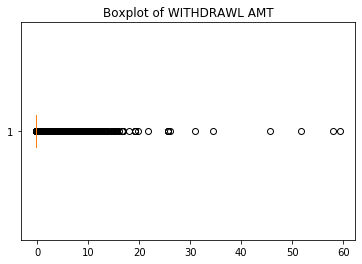

In [32]:
plt.title('Boxplot of WITHDRAWL AMT')
plt.boxplot(ssdata['WITHDRAWAL AMT'],vert=False)
plt.show()

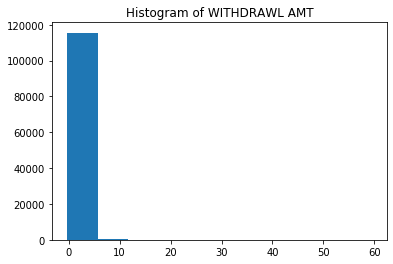

In [33]:
plt.title('Histogram of WITHDRAWL AMT')
plt.hist(ssdata['WITHDRAWAL AMT'])
plt.show()

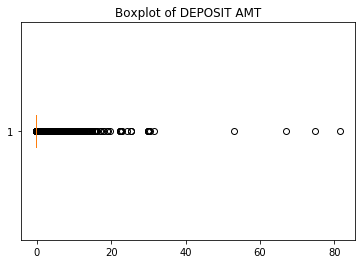

In [34]:
plt.title('Boxplot of DEPOSIT AMT')
plt.boxplot(ssdata['DEPOSIT AMT'],vert=False)
plt.show()

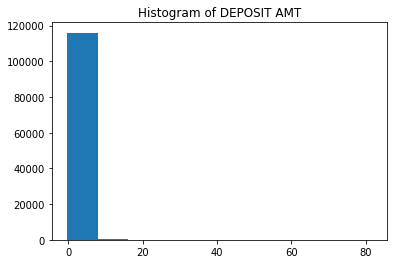

In [35]:
plt.title('Histogram of DEPOSIT AMT')
plt.hist(ssdata['DEPOSIT AMT'])
plt.show()

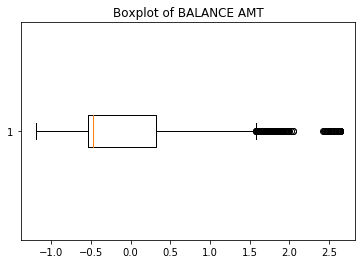

In [36]:
plt.title('Boxplot of BALANCE AMT')
plt.boxplot(ssdata['BALANCE AMT'],vert=False)
plt.show()

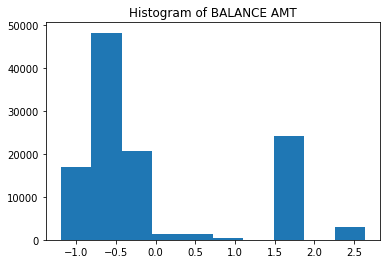

In [37]:
plt.title('Histogram of BALANCE AMT')
plt.hist(ssdata['BALANCE AMT'])
plt.show()

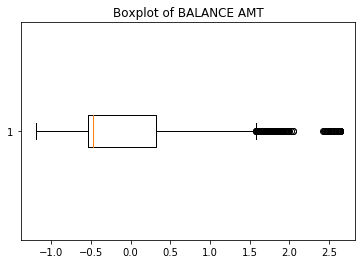

In [38]:
plt.title('Boxplot of BALANCE AMT')
plt.boxplot(ssdata['BALANCE AMT'],vert=False)
plt.show()

In [39]:
assdata=np.array(ssdata)

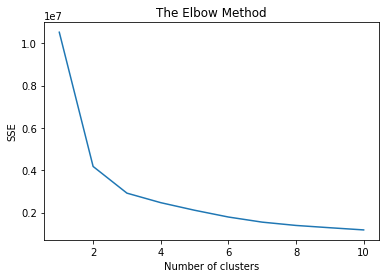

In [46]:
ls=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(assdata)
    ls.append(km.inertia_)
plt.plot(range(1,11),ls)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')  # sum of squared distances of samples to their closest cluster center
plt.show()

In [47]:
kmeans = KMeans(n_clusters=3) # You want cluster the passenger records into 2: Survived or Not survived
labels=kmeans.fit(assdata)

In [48]:
labels.labels_

array([0, 1, 2, ..., 1, 1, 1], dtype=int32)

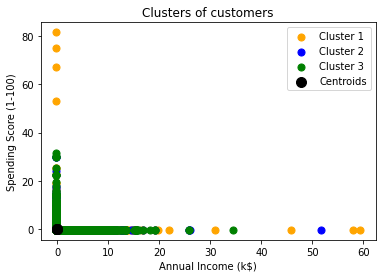

In [49]:
plt.scatter(assdata[labels.labels_ == 0, 0], assdata[labels.labels_ == 0,1], s= 50, c = 'orange',label = 'Cluster 1')
plt.scatter(assdata[labels.labels_ == 1, 0], assdata[labels.labels_ == 1,1], s= 50, c = 'blue',label = 'Cluster 2')
plt.scatter(assdata[labels.labels_ == 2, 0], assdata[labels.labels_ == 2,1], s= 50, c = 'green',label = 'Cluster 3')
#plt.scatter(assdata[labels.labels_ == 3, 0], assdata[labels.labels_ == 3,1], s= 50, c = 'yellow',label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c ='black',label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

dbsc = DBSCAN(eps=3.75, min_samples=5).fit(assdata)

In [51]:
pd.Series(dbsc.labels_).value_counts()

 0    116152
-1        49
dtype: int64

In [52]:
dbsc.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
from sklearn.cluster import Birch

In [54]:
br = Birch(threshold=0.5, n_clusters=3).fit(assdata)

In [55]:
br.labels_

array([0, 2, 1, ..., 2, 2, 2])

In [56]:
ssdata['cluster_Labels']=br.labels_

In [57]:
ssdata.head()

,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,YEAR,MONTH,DAY,cluster_Labels
0,-0.26878,-0.158204,2.628656,2017,6,29,0
1,-0.26878,-0.158204,2.630525,2017,7,5,2
2,-0.26878,-0.233368,2.631460,2017,7,18,1
3,-0.26878,0.142451,2.637070,2017,8,1,2
4,-0.26878,-0.233368,2.638005,2017,8,16,1


In [58]:
data['cluster_Labels']=br.labels_

In [59]:
data.head()

,Account No,DATE,TRANSACTION DETAILS,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,YEAR,MONTH,DAY,cluster_Labels
0,409000611074,2017-06-29,TRF FROM Indiaforensic SERVICES,2017-06-29,0.0,1000000.0,1000000.0,2017,6,29,0
1,409000611074,2017-07-05,TRF FROM Indiaforensic SERVICES,2017-07-05,0.0,1000000.0,2000000.0,2017,7,5,2
2,409000611074,2017-07-18,FDRL/INTERNAL FUND TRANSFE,2017-07-18,0.0,500000.0,2500000.0,2017,7,18,1
3,409000611074,2017-08-01,TRF FRM Indiaforensic SERVICES,2017-08-01,0.0,3000000.0,5500000.0,2017,8,1,2
4,409000611074,2017-08-16,FDRL/INTERNAL FUND TRANSFE,2017-08-16,0.0,500000.0,6000000.0,2017,8,16,1


In [ ]:
# creating a user defined function which will filter the feature

def bar_chart(feature):
    Group1 = data[data['cluster_Labels']==0][feature].value_counts()
    Group2 = data[data['cluster_Labels']==1][feature].value_counts()
    Group3 = data[data['cluster_Labels']==1][feature].value_counts()
    # creating data frame from the bifurcation(alive/dead) we have done above
    df = pd.DataFrame([Group1,Group2,Group3])
    df.index = ['Group1','Group2','Group3']
    #plottinf a stacked bar chart of the dataframe created
    df.plot(kind='bar',stacked=True, figsize=(10,5))